#### Baseball Case Study
## Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

* -- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

* -- Output: Number of predicted wins (W)

##### 
In this Case Study we have to use Machine Learning models to predict the number of wins form the input provided such as Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

##### The steps to be followed to complete the Case Study.
* Importing the data
* Cleaning and Preparing the data.
* Visualizing the data.
* Adding the required features.
* Adding the required feature using K-means clustering.
* Splitting the dataset into train and test.
* Selecting the metrics : mean absolute error vs mean squared error
* Linear Regression Model
* 
* 
* 
Conclusion.

## Attribute
* W - WIN (Target Variable)
* R - Runs
* AB - At Bats
* H - Hits
* 2B - Doubles
* 3B - Triples
* HR - Homeruns
* BB - Walks
* SO - Strikeouts
* SB - Stolen Bases
* RA - Runs Allowed
* ER - Earned Runs
* ERA - Earned Run Average
* SHO - Shutouts
* SV - Saves
* E - Errors

In [3]:
# importing the required libraries.

import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import joblib

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
# loading the dataset from the folder.
df = pd.read_csv(r'C:\Users\tusha\Downloads\baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [5]:
# to check the dimensions of the dataset.
df.shape

(30, 17)

In [6]:
# it will shows the null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [7]:
# It shows the types of data types are used in the dataset.
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [8]:
# It describes the dataset is having the no. of counts, mean, median, 1st qunatile, 2nd quantile, 3rd quantile,std deviation, minimum and maximum
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [9]:
# The counts are same for all which means that there are no null values.
# Mean & median are mostly same in all features.
# H & HR are the one which has mean higher than median which means data is right skewed in nature.
# W,AB,3B,2B,SO have high standard deviation.
# Possibility of outliers are very less.

In [10]:
# Is used to check the number of null values in the particular columns. 
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

## EDA
### Univariate Analysis

In [11]:
df.W.value_counts(normalize=True,sort=True)

68     0.100000
83     0.066667
74     0.066667
76     0.066667
81     0.066667
64     0.033333
93     0.033333
92     0.033333
90     0.033333
88     0.033333
87     0.033333
86     0.033333
85     0.033333
84     0.033333
80     0.033333
97     0.033333
100    0.033333
78     0.033333
63     0.033333
79     0.033333
71     0.033333
67     0.033333
98     0.033333
95     0.033333
Name: W, dtype: float64

In [12]:
# from above we can get the percentage of win from 63 to 100 matches.

<AxesSubplot:xlabel='W', ylabel='count'>

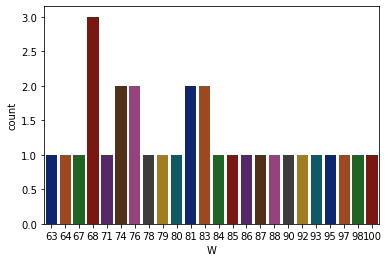

In [13]:
sns.countplot(x=df.W,order=None,hue_order=None,palette='dark',)

In [14]:
# from the countplot we can see the number of wins ranges from 63 to 100.
# 3 team has 68 wins

#### HIstplot without bins

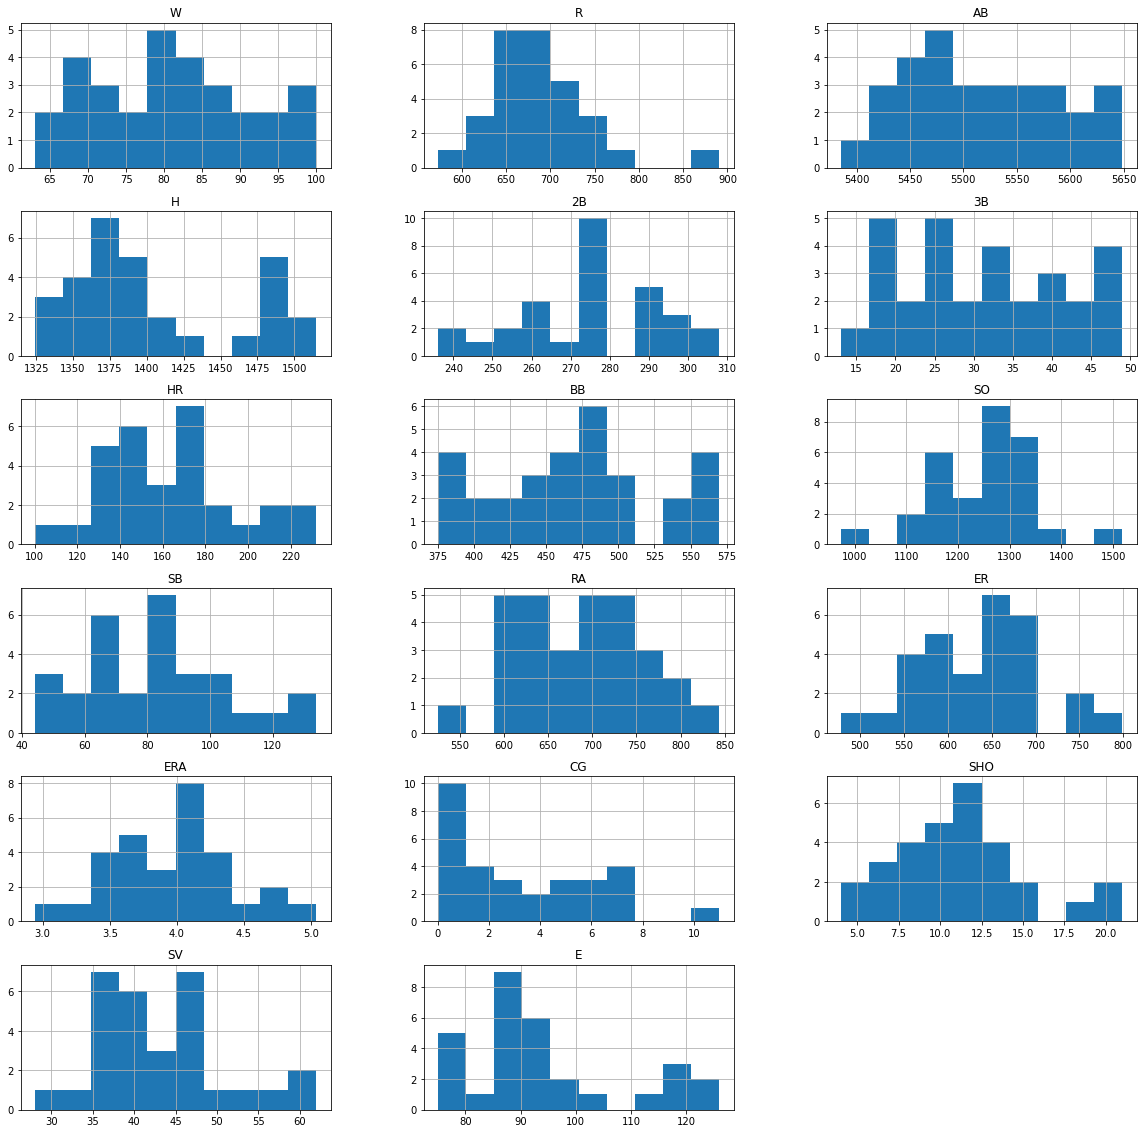

In [15]:
df.hist(figsize=(20,20),layout=(6,3))
plt.show()

#### Histplot with Bins

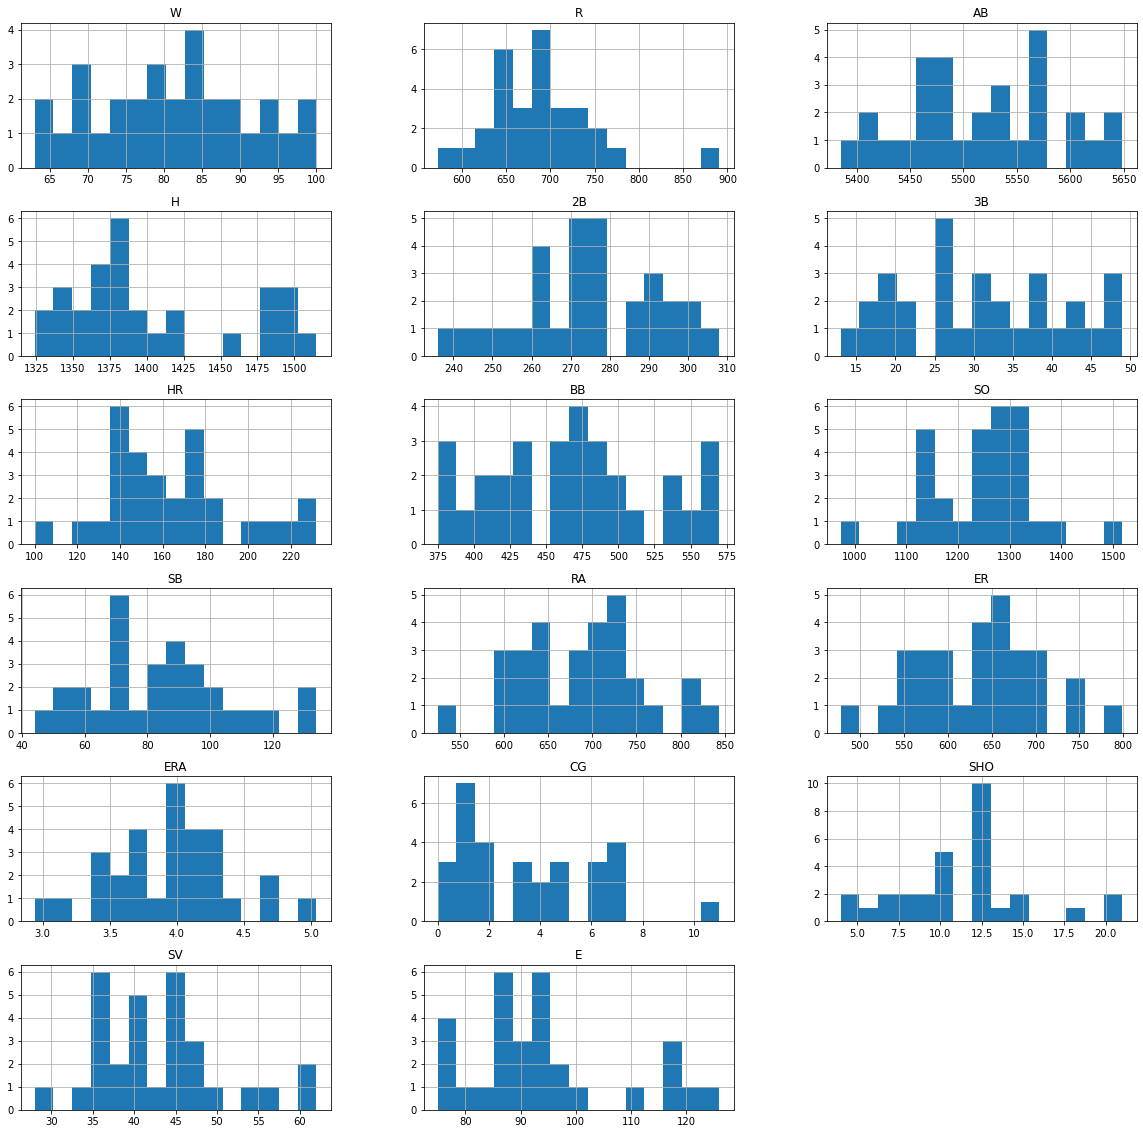

In [16]:
df.hist(bins=15,figsize=(20,20),layout=(6,3))
plt.show()

In [17]:
# Here we can see that data is normally distributed and also skewness is present.
# In 2B skewness is present towads left side.

### Bivariate Analysis
To check the relationship between independent and dependent variables.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='W', ylabel='SV'>

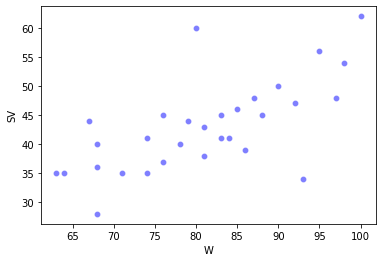

In [18]:
sns.scatterplot(x='W', y='SV',alpha=0.5 , c=(0,0,1),edgecolors='r', data=df)

In [19]:
# it can be seen that save have a positive relation with the win.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='W', ylabel='BB'>

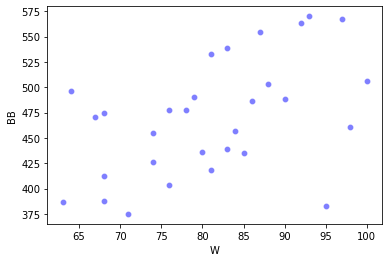

In [20]:
sns.scatterplot(x='W', y='BB',alpha=0.5 , c=(0,0,1),edgecolors='r', data=df)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='W', ylabel='SHO'>

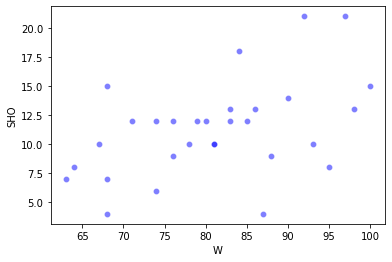

In [21]:
sns.scatterplot(x='W', y='SHO',alpha=0.5, c=(0,0,1),edgecolors='r', data=df)

In [22]:
# no specific pattern.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='W', ylabel='R'>

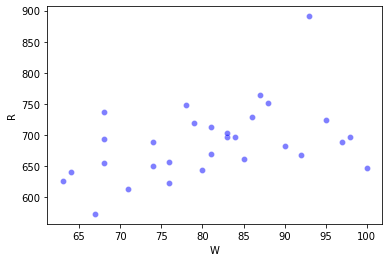

In [23]:
sns.scatterplot(x='W', y='R',alpha=0.5  , c=(0,0,1),edgecolors='r', data=df)

In [24]:
# it can be seen that runs have a positive relation with the win.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='R', ylabel='2B'>

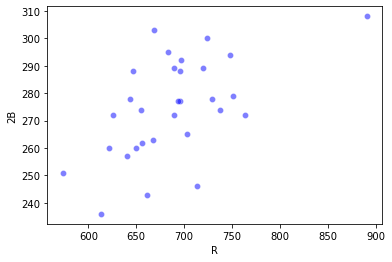

In [25]:
sns.scatterplot(x='R', y='2B',alpha=0.5 , c=(0,0,1),edgecolors='r', data=df)

In [26]:
# no specific pattern.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='W', ylabel='HR'>

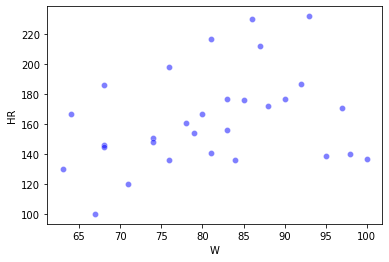

In [27]:
sns.scatterplot(x='W', y='HR',alpha=0.5 , c=(0,0,1),edgecolors='r', data=df)

In [28]:
# it can be seen that home runs have a positive relation with the win.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='W', ylabel='SO'>

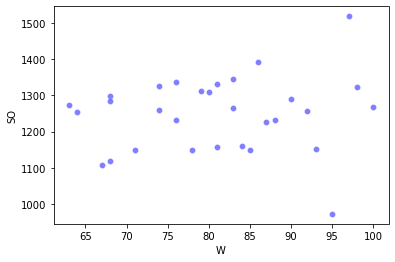

In [29]:
sns.scatterplot(x='W', y='SO',alpha=0.5 , c=(0,0,1),edgecolors='r', data=df)

In [30]:
# it can be seen that strikeouts have a positive relation with the win.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='W', ylabel='CG'>

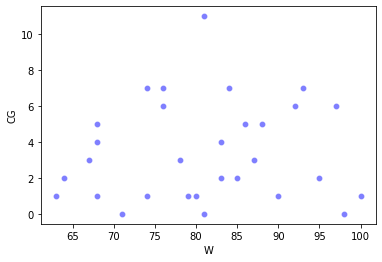

In [31]:
sns.scatterplot(x='W', y='CG',alpha=0.5 , c=(0,0,1),edgecolors='r', data=df)

In [32]:
# no specific pattern.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='W', ylabel='H'>

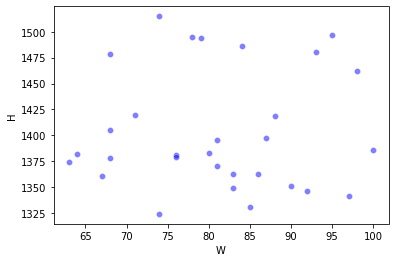

In [33]:
sns.scatterplot(x='W', y='H',alpha=0.5  , c=(0,0,1),edgecolors='r', data=df)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='W', ylabel='AB'>

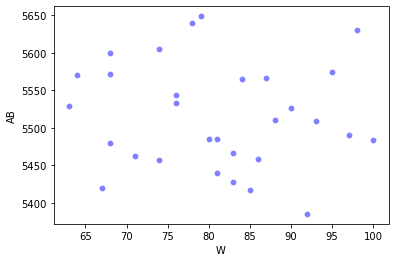

In [34]:
sns.scatterplot(x='W', y='AB',alpha=0.5 , c=(0,0,1),edgecolors='r', data=df)

In [35]:
# no specific pattern.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='W', ylabel='E'>

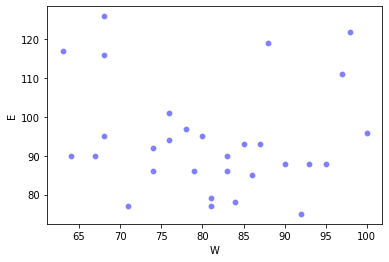

In [36]:
sns.scatterplot(x='W', y='E',alpha=0.5  , c=(0,0,1),edgecolors='r', data=df)

In [37]:
# it can be seen that error have a very decreased relation with the win.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='W', ylabel='SB'>

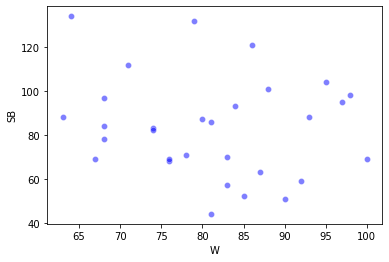

In [38]:
sns.scatterplot(x='W', y='SB',alpha=0.5 , c=(0,0,1),edgecolors='r', data=df)

In [39]:
# it can be seen that Stolen Bases have a positive relation with the win.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='W', ylabel='ER'>

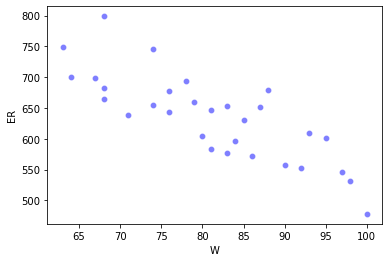

In [40]:
sns.scatterplot(x='W', y='ER',alpha=0.5 , c=(0,0,1),edgecolors='r', data=df)

In [41]:
# ER is highly negatively correlated with wins.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='W', ylabel='3B'>

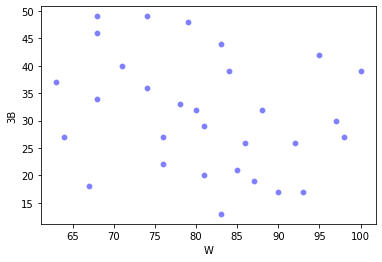

In [42]:
sns.scatterplot(x='W', y='3B',alpha=0.5 , c=(0,0,1),edgecolors='r', data=df)

In [43]:
# no specific pattern.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='W', ylabel='RA'>

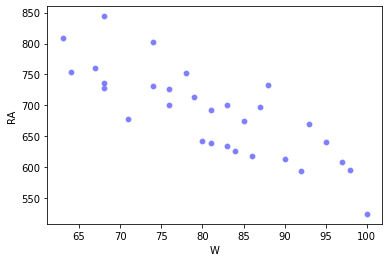

In [44]:
sns.scatterplot(x='W', y='RA',alpha=0.5 , c=(0,0,1),edgecolors='r', data=df)

In [45]:
# RA is highly negatively correlated with wins

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='W', ylabel='ERA'>

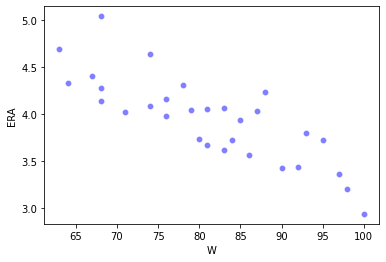

In [46]:
sns.scatterplot(x='W', y='ERA',alpha=0.5, c=(0,0,1),edgecolors='r', data=df)

In [47]:
# ERA is highly negatively correlated with wins

## Multivariate Analysis

In [48]:
# To check the correlation between the features.
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

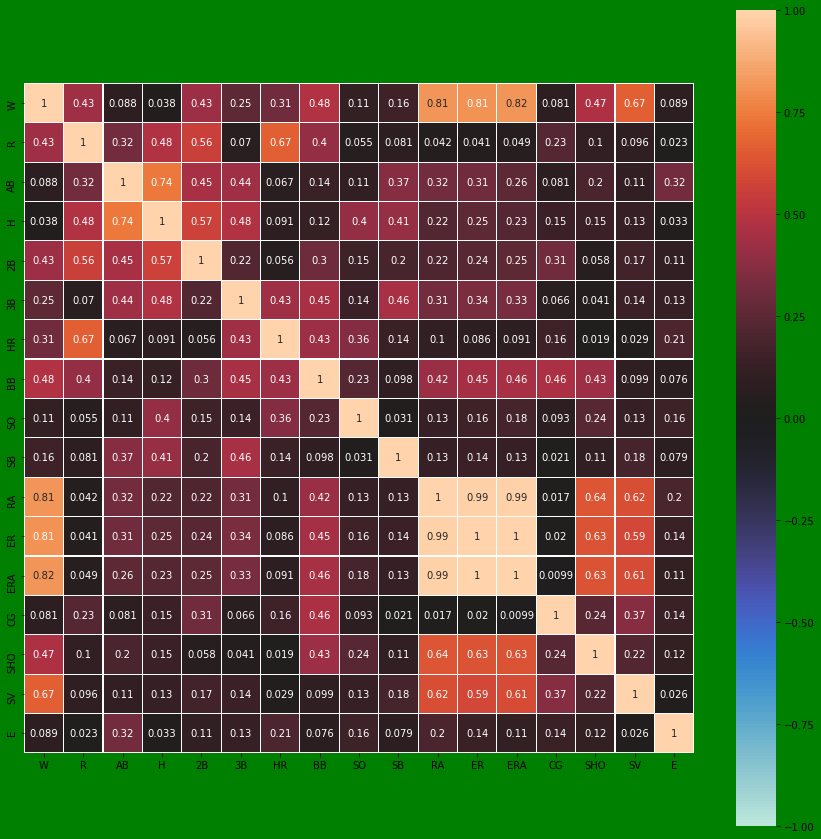

In [49]:
df_corr = df.corr().abs()

# .corr().abs    will get the numbers that will be stored in   df_corr()


plt.figure(figsize=(15,15),facecolor='green')
# it show the size of the heatmap figure

sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True, square=True, center=0, fmt='.2g',linewidth=0.1)
# above all are visualisation technique
# vmin=-1 means that it will starts from -1 and goes upto vmax = +1 
#annot=True  will take the data and put into the heatmap boxes
#square=True boxes will be square.
# fmt='.2g' is formating i.e. digits after the decimal.
# linewiddth=0.1 it will make the gaps between the square boxes.

plt.tight_layout

In [50]:
# from heatmap we can see that how Saves are highly correlated with the chances of winnnig the game.
# It can be observed that Runs Alllowed,Earned Runs, Earned Run Average(ERA) are highly negatively correlated with the winnig.

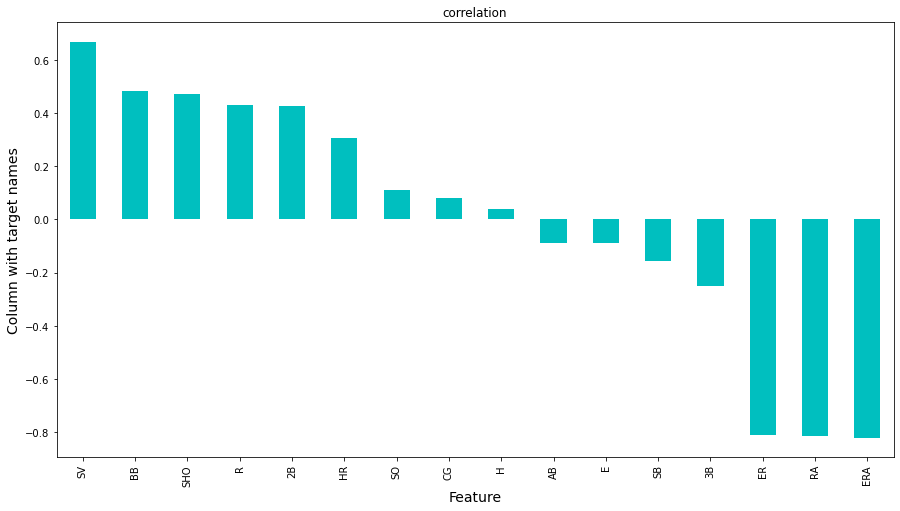

In [51]:
plt.figure(figsize=(15,8))
df.corr()['W'].sort_values(ascending = False).drop(['W']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('correlation')
plt.show()

In [52]:
from pandas.plotting import scatter_matrix

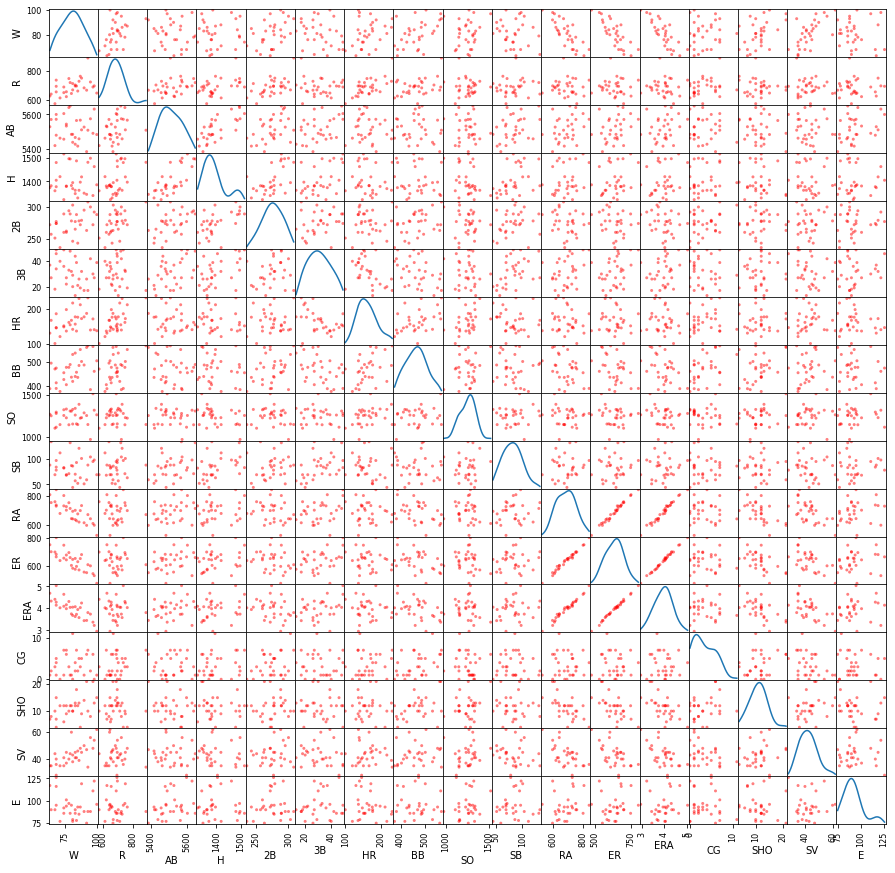

In [53]:
scatter_matrix(df, figsize= (15,15), diagonal = 'kde', color ='r')
plt.show()

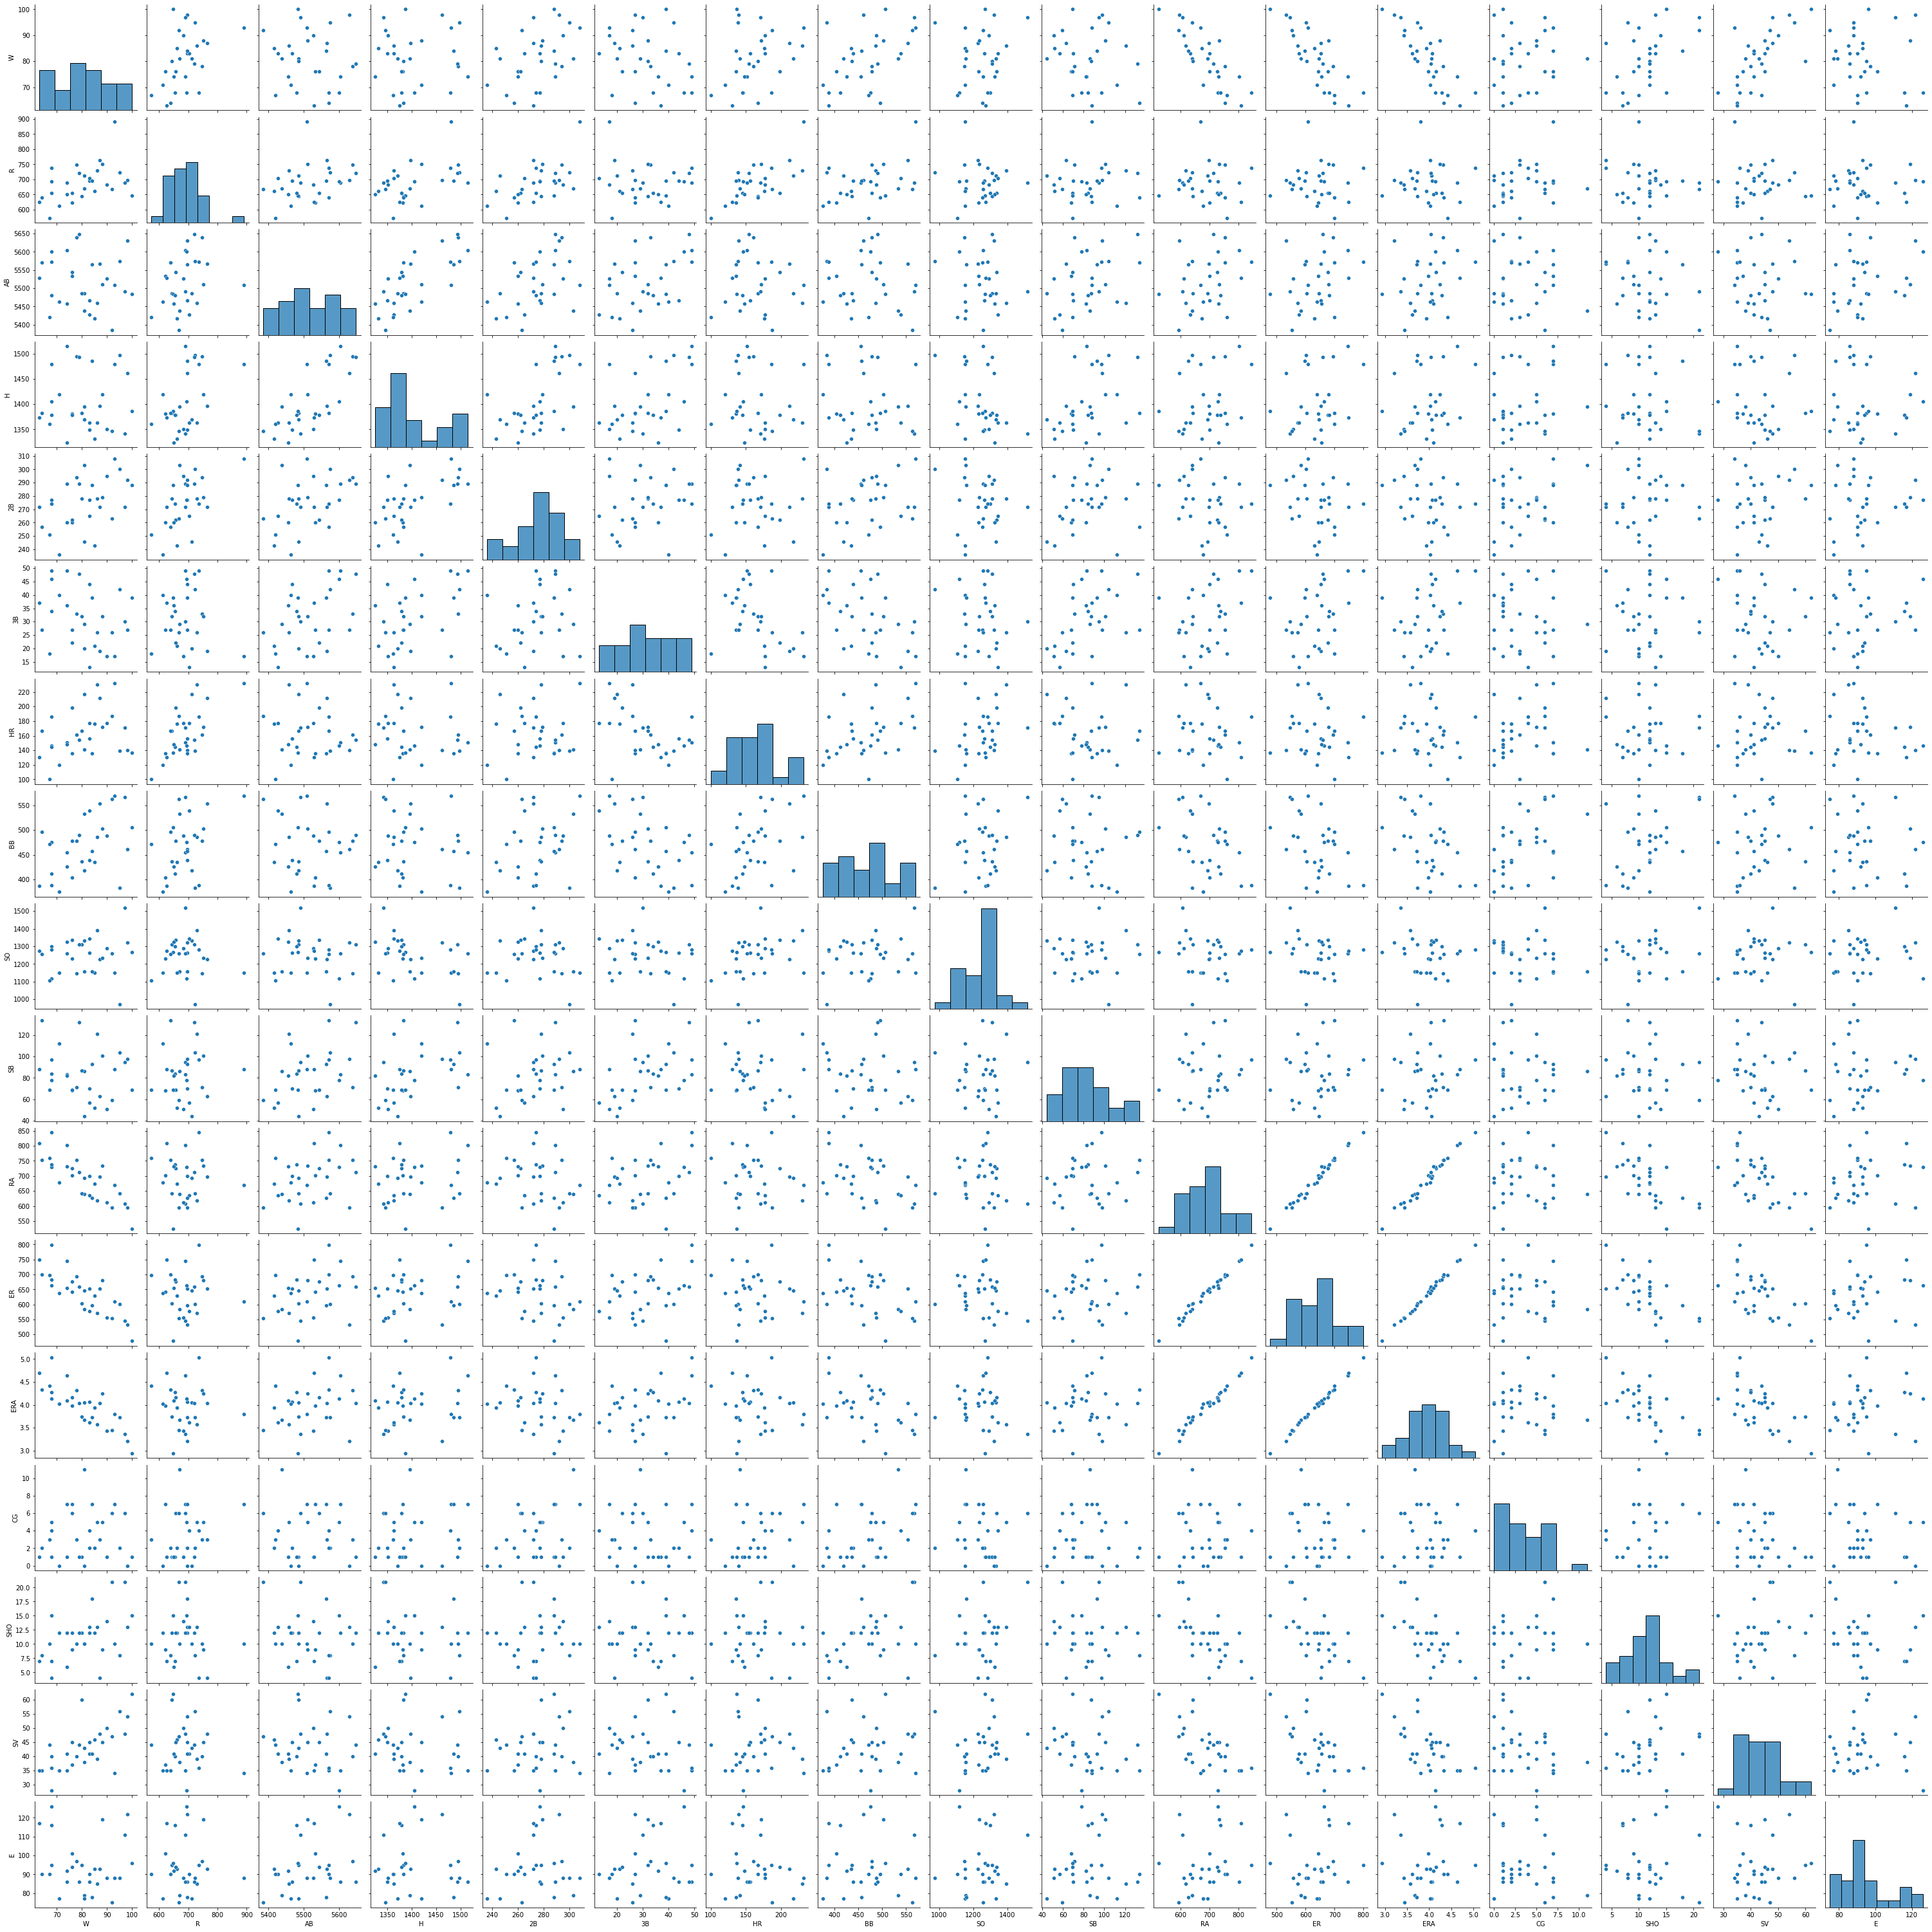

In [54]:
sns.pairplot(df)

In [55]:
#Handling outliers using Zscore method
from scipy.stats import zscore
zscr=np.abs(zscore(df))
threshold=3

#Lets check the presence of outlier
print("Shape before removing the outlier",df.shape)
dfnew=df[(zscr<3).all(axis=1)]
print("Shape after removing the outlier",dfnew.shape)

Shape before removing the outlier (30, 17)
Shape after removing the outlier (29, 17)


In [56]:
print("Data retained in % =",((29/30)*100))


Data retained in % = 96.66666666666667


In [57]:
# We dno't need tro visualize the labels, so seperating only features into new dataframe
df_features = df

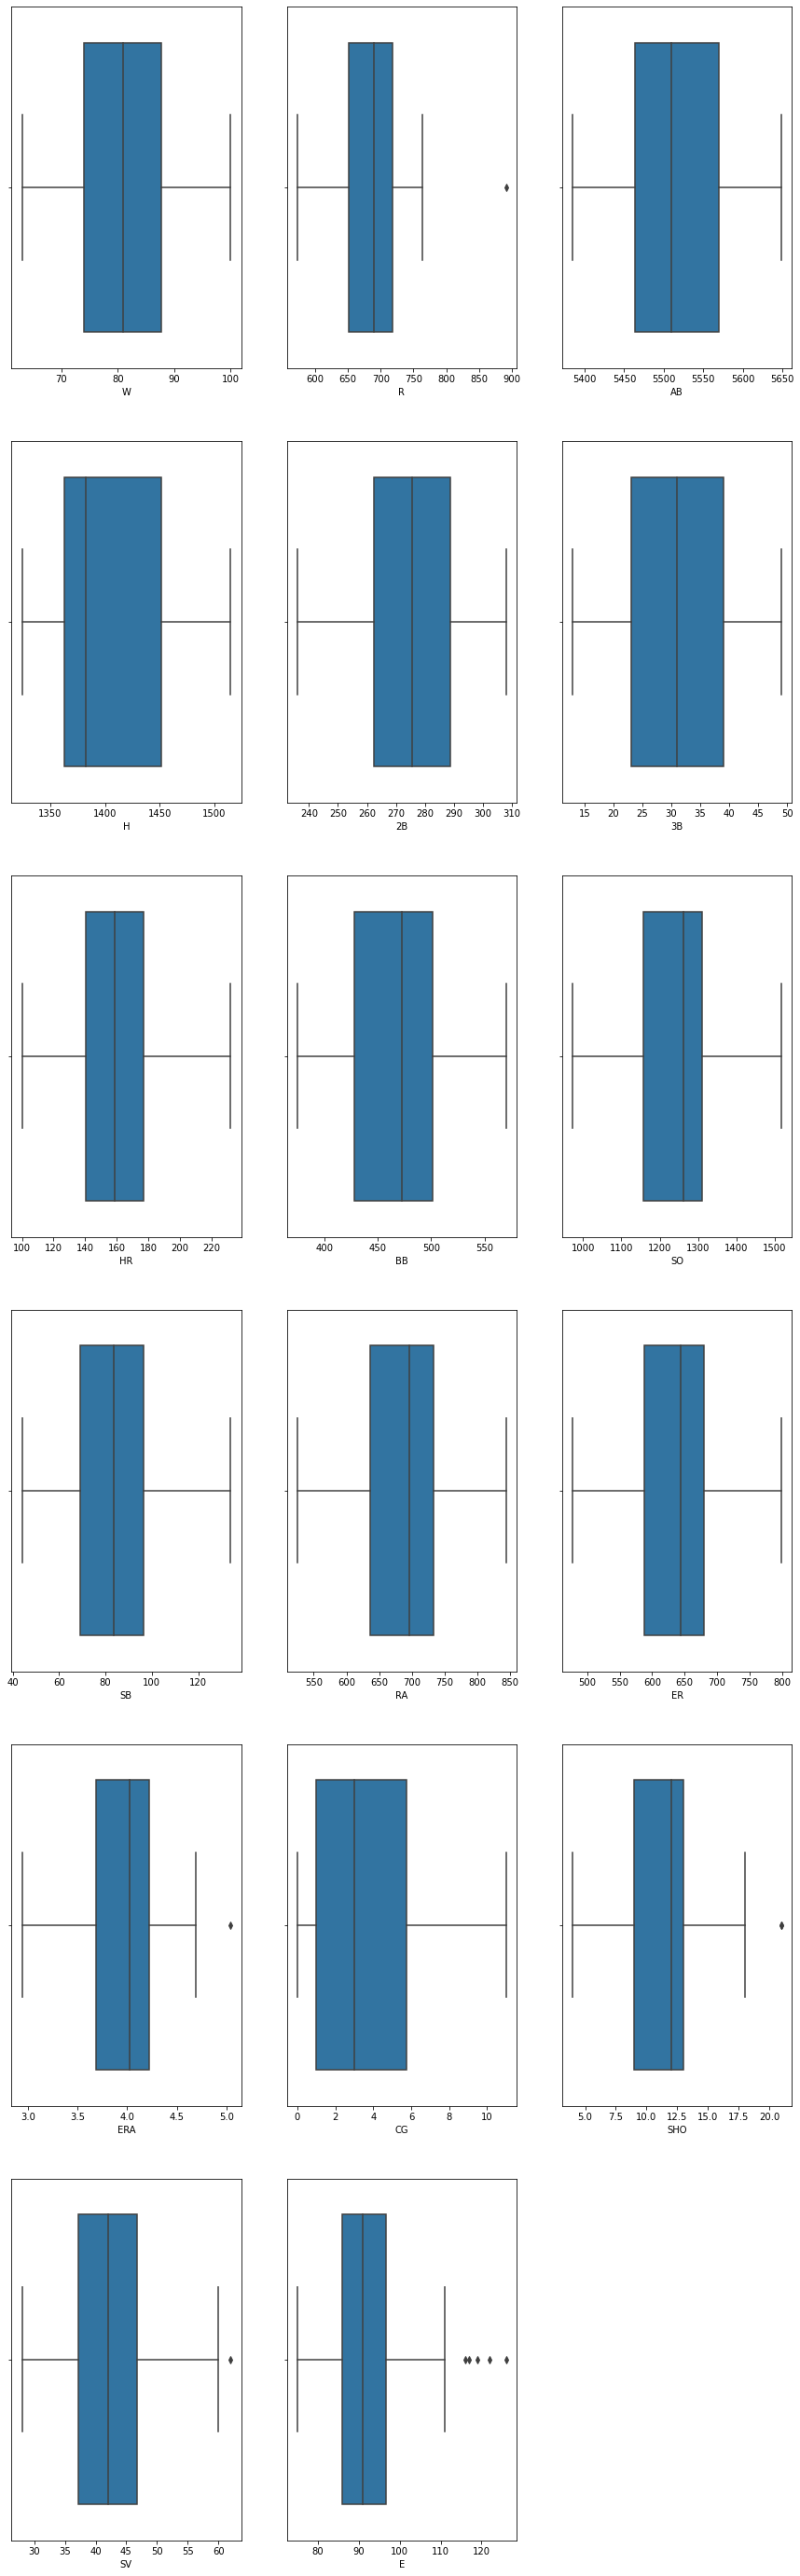

In [58]:
# Visualize the outliers using boxplot
plt.figure(figsize=(15,50))
graph = 1

for column in df_features:
    if graph<=30:
        ax = plt.subplot(6,3,graph)
        sns.boxplot(df_features[column])
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

#### Removing Outliers

In [59]:
# zscore

from scipy.stats import zscore
z=np.abs(zscore(df))
z


array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 6.66233927e-01, 5.05110079e-01,
        5.06955186e-01, 5.39806195e-01, 8.14628593e-01, 1.67160651e+00,
        4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 1.65970766e-01, 2.48929848e-01,
        2.54597523e-01, 5.39806195e-01, 1.72800005e-01, 2.49879323e-01,
        6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 6.80339091e-01, 7.51623132e-01,
        6.41346840e-01, 2.77264091e+00, 3.20914294e-01, 6.54856158e-01,
        1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.010

In [60]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [61]:
z[5][1]

3.5096470447193067

In [62]:
# There is only one outlier which need to be removed comes in range above a score of 3

In [63]:
df_new=df[(z<3).all(axis=1)]

In [64]:
df.shape

(30, 17)

In [65]:
df_new.shape

(29, 17)

In [66]:
# 1 row removed

In [67]:
outliers_removed = 1

In [68]:
percentage_loss = outliers_removed/30*100

In [69]:
percentage_loss 

3.3333333333333335

In [70]:
# The loss is 3.333% which is acceptable.

In [71]:
data=df_new.copy()

In [72]:
data.shape

(29, 17)

In [73]:
# The outliers have been removed

## Skewness

In [74]:
#initialising x and y

x=data.drop('W',axis=1)
y=data['W']

In [75]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [76]:
x.skew()

R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [77]:
# From above we can see some skewness in H,CG,SHO,SV,E which can be corrected.

In [78]:
from sklearn.preprocessing import PowerTransformer
x['H']=PowerTransformer().fit_transform(x['H'].values.reshape(-1,1))
x['CG']=PowerTransformer().fit_transform(x['CG'].values.reshape(-1,1))
x['SV']=PowerTransformer().fit_transform(x['SV'].values.reshape(-1,1))
x['E']=PowerTransformer().fit_transform(x['E'].values.reshape(-1,1))

In [79]:
x.skew()

R     -0.215364
AB     0.169573
H      0.000000
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.045947
SHO    0.526943
SV    -0.000925
E      0.065585
dtype: float64

In [80]:
x.isnull().sum()

R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [81]:
# The skewness present in the dataset has been removed successfully.

### Multicollinearity 
Now checking the multicollinearity 

In [82]:
m=data.drop('W',axis=1)

In [83]:
SC=StandardScaler()
X=SC.fit_transform(m)

In [84]:
X

array([[ 0.95939835,  0.83008422,  1.73830631,  1.55653766,  1.01084549,
        -0.76586314, -1.53635899, -2.72762331,  0.9059529 , -0.66451353,
        -0.51114812, -0.51138828, -0.50148589, -0.81326172,  1.64315663,
        -0.47109143],
       [ 0.33114717, -0.70283074, -0.93869788,  0.20117132,  1.20891656,
        -0.18138864, -0.49502051,  0.12189552, -0.58531515,  0.15463823,
         0.23216082,  0.23895226, -0.50148589,  0.15929869,  0.21100645,
        -0.61489829],
       [-0.27466646, -1.10025314, -0.10665604,  1.73332457, -0.2766165 ,
        -0.69710144,  1.25294051, -0.9258657 ,  0.11645805, -0.67839746,
        -0.75415297, -0.64380131,  2.85461197, -0.32698152, -0.70036184,
        -1.1182223 ],
       [-1.32923093,  0.23395062, -0.35988616, -0.8006212 , -0.47468758,
        -0.8690057 , -1.14585706, -0.20124579, -0.6730368 ,  0.16852216,
         0.08921679,  0.04033271,  1.36301292, -0.57012162, -0.83055731,
         0.46365315],
       [ 0.17408438,  1.25589393,  2

In [85]:
#checking the multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['features']=m.columns

In [86]:
vif.round(1)

,vif,features
0,7.2,R
1,18.3,AB
2,10.6,H
3,3.7,2B
4,3.3,3B
5,8.4,HR
6,3.4,BB
7,2.7,SO
8,2.1,SB
9,197.3,RA


In [87]:
# As we can see that multicollinearity present among the columns. Apart from R,2B,3B,BB,SO,SB,CG,SHO,E.

# Here we can see that all the columns are multicorrelated.

# SV,R,HR,H,AB,RA,ER,ERA are multicorrelated.

# This has to be removed for better model building.

In [88]:
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,0.0,300,42,139,383,973,104,641,601,3.73,-0.307098,8,1.532753,-0.348265
1,696,5467,0.0,277,44,156,439,1264,70,700,653,4.07,-0.307098,12,0.312020,-0.540820
2,669,5439,0.0,303,29,141,533,1157,86,640,584,3.67,2.011315,10,-0.664137,-1.326125
3,622,5533,0.0,260,27,136,404,1231,68,701,643,3.98,1.264463,9,-0.820689,0.650818
4,689,5605,0.0,289,49,151,455,1259,83,803,746,4.64,1.264463,12,-1.149165,-0.540820


#### Now we have to drop 4 columns because of multicollinearity.

In [89]:
x.drop('R',axis=1,inplace=True)  # SV and R are multicorrelated so, now we have to drop the R

In [90]:
x.drop('H',axis=1,inplace=True)  # HR and H are multicorrelated so, now we have to drop the H

In [91]:
x.drop('RA',axis=1,inplace=True)  # AB and RA are multicorrelated so, now drop the H. As RA is correlated with many columns

In [92]:
x.drop('ER',axis=1,inplace=True)  # ER and ERA are multicorrelated so, now we have to drop the ER

In [93]:
#checking multicollinearity after dropping multicollinear columns
m=x.copy()
SC=StandardScaler()
X=SC.fit_transform(m)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['features']=m.columns

In [94]:
vif.round(1)

,vif,features
0,2.3,AB
1,2.9,2B
2,2.8,3B
3,2.0,HR
4,2.6,BB
5,1.9,SO
6,1.6,SB
7,4.4,ERA
8,2.3,CG
9,3.1,SHO


#####  
As we can see that the values are below 5. Therefore multicollinearity is removed.

Now there is no multicollinearity. Removed all the multicollinear columns. Now we can fit the datas to model and check score

# Modeling

In [95]:
x.head()

,AB,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,5575,300,42,139,383,973,104,3.73,-0.307098,8,1.532753,-0.348265
1,5467,277,44,156,439,1264,70,4.07,-0.307098,12,0.312020,-0.540820
2,5439,303,29,141,533,1157,86,3.67,2.011315,10,-0.664137,-1.326125
3,5533,260,27,136,404,1231,68,3.98,1.264463,9,-0.820689,0.650818
4,5605,289,49,151,455,1259,83,4.64,1.264463,12,-1.149165,-0.540820


In [96]:
X = SC.fit_transform(x)

In [97]:
x=pd.DataFrame(X,columns=x.columns)

In [98]:
x.head()

,AB,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,0.830084,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.511388,-0.307098,-0.813262,1.532753,-0.348265
1,-0.702831,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.238952,-0.307098,0.159299,0.312020,-0.540820
2,-1.100253,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.643801,2.011315,-0.326982,-0.664137,-1.326125
3,0.233951,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.040333,1.264463,-0.570122,-0.820689,0.650818
4,1.255894,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.496876,1.264463,0.159299,-1.149165,-0.540820


In [99]:
X.shape

(29, 12)

In [100]:
y.shape

(29,)

In [101]:
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [102]:
#finding best random_state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.33,random_state=i)
    LR=LinearRegression()
    LR.fit(X_train,y_train)
    predrf=LR.predict(X_test)
    r2=r2_score(y_test,predrf)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
print("Best accuracy is ",maxAccu," on random_state ",maxRS)

Best accuracy is  0.9526336981726453  on random_state  1


In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=1)

In [104]:
#shapes of x and y (train,test)
x_train.shape

(19, 12)

In [105]:
x_test.shape

(10, 12)

In [106]:
y_train.shape

(19,)

In [107]:
y_test.shape

(10,)

In [108]:
# different algorithm going to use
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,LassoCV


lr=LinearRegression()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
ad=AdaBoostRegressor()
gd=GradientBoostingRegressor()
ri=Ridge(alpha=1)
la=Lasso(alpha=1)

In [109]:
#code for Training and Prediction 

def eval(x):
    mod=x
    print(mod)
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    
    print("r2_score(predicted_train) is ",r2_score(y_train,mod.predict(x_train)))
    print("\n")
    print("r2_score is :",r2_score(y_test,pred))
    print("\n")
    print("Score of trained data :",mod.score(x_train,y_train))
    print("\n")
    print("Score of test data :",mod.score(x_test,y_test))
    print("\n")
    print("Error")
    print("mean absolute error : ",mean_absolute_error(y_test,pred))
    print("mean squared error : ",mean_squared_error(y_test,pred))

In [110]:
eval(lr)

LinearRegression()
r2_score(predicted_train) is  0.8022693774333559


r2_score is : 0.9526336981726454


Score of trained data : 0.8022693774333559


Score of test data : 0.9526336981726454


Error
mean absolute error :  1.9044113940778715
mean squared error :  6.377398878035021


In [111]:
# the linear regression score for model training is is 80%
# the prediction with an accuracy is 95.26%

In [112]:
eval(dt)

DecisionTreeRegressor()
r2_score(predicted_train) is  1.0


r2_score is : 0.2676767676767676


Score of trained data : 1.0


Score of test data : 0.2676767676767676


Error
mean absolute error :  7.8
mean squared error :  98.6


In [113]:
# The Decision Tree Regressor is overfitting with accuracy of 37.83%
# while traning shows an accuracy of 100%.
# This is not efficient in new dataset.

In [114]:
eval(rf)

RandomForestRegressor()
r2_score(predicted_train) is  0.9181020105124835


r2_score is : 0.6528012477718361


Score of trained data : 0.9181020105124835


Score of test data : 0.6528012477718361


Error
mean absolute error :  5.273999999999998
mean squared error :  46.746839999999985


In [115]:
# Random forest has an accuracy of 66.34%. Which shows that it is overfitted.

In [116]:
eval(ad)

AdaBoostRegressor()
r2_score(predicted_train) is  0.9950464696171942


r2_score is : 0.5969119297550669


Score of trained data : 0.9950464696171942


Score of test data : 0.5969119297550669


Error
mean absolute error :  6.286666666666667
mean squared error :  54.271777777777785


In [117]:
# Adaboost regressor shows an accuracy of 75.50% which looks overfitting.

In [118]:
eval(gd)

GradientBoostingRegressor()
r2_score(predicted_train) is  0.9999999587847648


r2_score is : 0.6294816405303575


Score of trained data : 0.9999999587847648


Score of test data : 0.6294816405303575


Error
mean absolute error :  6.0483353772234505
mean squared error :  49.886591918992664


In [119]:
# Gradient Boosting regressor shows an accuracy of 65.86%

#### From above all the calculations it can be infered that Linear Regression model is 95.26%.
## Now we have to cross validate which model has low Mean_Absolute_error  to consider best model.

## Cross Validation

In [120]:
#since it is Regression problem we can cross check with its mean absolute error which has lowest error

from numpy import absolute

model=[lr,dt,rf,ad,gd]

for m in model:
    score=cross_val_score(m,x,y,scoring='neg_mean_absolute_error',cv=5)
    print(m,"Cross val score is ",score)
    score=absolute(score)
    print("mean is ",score.mean())

LinearRegression() Cross val score is  [-3.10700448 -4.98246561 -8.49111147 -2.5925256  -1.61318909]
mean is  4.157259249711158
DecisionTreeRegressor() Cross val score is  [-10.16666667  -9.83333333  -4.83333333  -6.5         -4.8       ]
mean is  7.226666666666667
RandomForestRegressor() Cross val score is  [ -4.83        -7.68333333 -10.08833333  -7.07666667  -2.324     ]
mean is  6.400466666666665
AdaBoostRegressor() Cross val score is  [ -4.57692308  -9.42083333 -10.49166667  -6.68888889  -1.75714286]
mean is  6.587090964590963
GradientBoostingRegressor() Cross val score is  [-6.37521546 -9.36476341 -9.22887727 -6.24717537 -1.13607546]
mean is  6.470421394670382


### Here we can see that Linear Regression Model has the higher accuracy than the trained accuracy. 
#### Now its time for hypertuning. But Linear Regression doesn't have any hyperparameters.

## Hyper Tuning

In [121]:
#Ridge Regression
eval(ri)

Ridge(alpha=1)
r2_score(predicted_train) is  0.7944962503449944


r2_score is : 0.8864778432988375


Score of trained data : 0.7944962503449944


Score of test data : 0.8864778432988375


Error
mean absolute error :  2.2498854180152152
mean squared error :  15.284623178244516


In [122]:
#lasso Regression
eval(la)

Lasso(alpha=1)
r2_score(predicted_train) is  0.7260766893866484


r2_score is : 0.7466035295887468


Score of trained data : 0.7260766893866484


Score of test data : 0.7466035295887468


Error
mean absolute error :  4.303558649474752
mean squared error :  34.11730077617114


### Hypertuning and finding alpha value.

In [123]:
#finding best alpha value using hypertuning method - GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from numpy import arange

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
search = GridSearchCV(ri, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

results = search.fit(x, y)

In [124]:
results.best_score_

-4.649916631654552

In [125]:
results.best_params_

{'alpha': 0.99}

In [126]:
# The alpha value is 0.99

In [127]:
ridgemodel=Ridge(alpha=0.99)

In [128]:
eval(ridgemodel)

Ridge(alpha=0.99)
r2_score(predicted_train) is  0.794578449443859


r2_score is : 0.8870905826266284


Score of trained data : 0.794578449443859


Score of test data : 0.8870905826266284


Error
mean absolute error :  2.2451462064348617
mean squared error :  15.20212395515075


In [129]:
ridgemodel.score(x_test,y_test)

0.8870905826266284

In [130]:
# The ridge regression give model accuracy of 88.70%, but again here training score is less than the testing score.

In [131]:
#Lasso Regularization

lasscv=LassoCV(alphas=None,cv=10,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(cv=10, normalize=True)

In [132]:
alpha=lasscv.alpha_


In [133]:
alpha

0.43774892672911736

In [134]:
lassomodel=Lasso(alpha)

In [135]:
eval(lassomodel)

Lasso(alpha=0.43774892672911736)
r2_score(predicted_train) is  0.771328465760888


r2_score is : 0.7698085470586745


Score of trained data : 0.771328465760888


Score of test data : 0.7698085470586745


Error
mean absolute error :  3.6323687750550193
mean squared error :  30.99297722402006


In [140]:
lassomodel.score(x_train,y_train)

0.771328465760888

In [141]:
lassomodel.score(x_test,y_test)

0.7698085470586745

##### From above all the analysis we can infered that the model is neither overfitted nor underfitted.

### After performing hyperparameter and hyperparameter tuning. Above Linear Regresion model is giving accuracy of 95% while prediction, during training the model is showing 80% as compared to testin gphase there is a possiblity of overfitting. To check that we have hypertuned and applied regularization in which lasso regression model gave training accuracy of 77.13%  and predicted accuracy of 76.98%.

## Finally Lasso Regularized Regression is selected for prediction of wins in Baseball game with accuracy of 76.98%.

## Saving the model

In [136]:
joblib.dump(lassomodel,"lassreg_B_wins_prediction.obj")

['lassreg_B_wins_prediction.obj']

In [137]:
#Lets Check loading the file 
BBwins_prediction=joblib.load("lassreg_B_wins_prediction.obj")

In [138]:
BBwins_prediction.score(x_test,y_test)

0.7698085470586745

In [139]:
pred=lassomodel.predict(x_test)
Conclusion=pd.DataFrame([BBwins_prediction.predict(x_test)[:],pred[:]],index=["Predicted","Original"])

In [140]:
Conclusion

,0,1,2,3,4,5,6,7,8,9
Predicted,99.991243,73.680929,74.240036,84.49097,83.942761,90.340549,75.880604,81.814744,67.722034,79.478522
Original,99.991243,73.680929,74.240036,84.49097,83.942761,90.340549,75.880604,81.814744,67.722034,79.478522


In [1]:
# From above we can see that the model is working well and giving exact results.

### The predicted data and Original data is matching well. 